# RasterIO

[RasterIO](http://rasterio.readthedocs.io/en/latest/) library is another work of [Sean Gillies](https://github.com/sgillies), this time as one of the results of his activities in [MapBox](http://mapbox.com). RasterIO deals with raster geographic datasets. 

RasterIO converts the data to [NumPy](http://numpy.org) structures (similar to Fiona, which converts vectors to GeoJSON structure).

## Our task

Out task is to identify healty vegetation from other land cover from satellite image from the [Sentinel satelite](http://copernicus.eu/main/sentinels) of the [Copernicus programm](http://copernicus.eu/).

### Input data
Data are downloaded from the [Earth Explorer](https://apps.sentinel-hub.com/eo-browser/) browser server, which is collecting data from Setinel satellites and enables to perform various analysis on client (web-browser) site.

Data are stored in the [data](data/) directory in a form of [GeoTiff](http://www.gdal.org/frmt_gtiff.html) files.

* [data/B01-2018-05-06.tiff](data/B01-2018-05-06.tiff)
* [data/B02-2018-05-06.tiff](data/B02-2018-05-06.tiff)
* [data/B03-2018-05-06.tiff](data/B03-2018-05-06.tiff)
* [data/B04-2018-05-06.tiff](data/B04-2018-05-06.tiff)
* [data/B05-2018-05-06.tiff](data/B05-2018-05-06.tiff)
* [data/B06-2018-05-06.tiff](data/B06-2018-05-06.tiff)
* [data/B07-2018-05-06.tiff](data/B07-2018-05-06.tiff)
* [data/B08-2018-05-06.tiff](data/B08-2018-05-06.tiff)
* [data/B09-2018-05-06.tiff](data/B09-2018-05-06.tiff)
* [data/B10-2018-05-06.tiff](data/B10-2018-05-06.tiff)
* [data/B11-2018-05-06.tiff](data/B11-2018-05-06.tiff)
* [data/B12-2018-05-06.tiff](data/B12-2018-05-06.tiff)
* [data/B8A-2018-05-06.tiff](data/B8A-2018-05-06.tiff)

You can download and open it using e.g. [QGIS](https://qgis.org).

## Opening raster data set

In following example, we will open GeoTIFF file, display some metadata and display using Jupyter notebook capabilities


In [13]:
import rasterio

green = rasterio.open('data/B03-2018-05-06.tiff')

# print metadata
print("Bounds:", green.bounds)

print("Bands:", green.count)

print("Coordinte system:", green.crs)

print("GeoTIFF tags:", green.tags())

print("Raster dimensions:", (green.width, green.height))

print("Spatial resolution:", green.res)

Bounds: BoundingBox(left=14.513969421386719, bottom=48.66330341686951, right=15.073928833007814, top=48.866521538507754)
Bands: 1
Coordinte system: CRS({'init': 'epsg:4326'})
GeoTIFF tags: {'AREA_OR_POINT': 'Area', 'TIFFTAG_RESOLUTIONUNIT': '1 (unitless)', 'TIFFTAG_XRESOLUTION': '1', 'TIFFTAG_YRESOLUTION': '1'}
Raster dimensions: (3117, 1716)
Spatial resolution: (0.00017964690780272554, 0.00011842547881016553)


How do we know, that `B03` is supposed to represent Green color band?

This is described in the documentation, https://earth.esa.int/web/sentinel/user-guides/sentinel-2-msi/resolutions/spatial

![spatial resolution](https://earth.esa.int/image/image_gallery?uuid=c5fa6c3e-2978-4fb8-ac95-3be9c5171be2&groupId=247904&t=1345630320883) SENTINEL-2 10 m spatial resolution bands: B2 (490 nm), B3 (560 nm), B4 (665 nm) and B8 (842 nm)


![spatial resolution](https://earth.esa.int/image/image_gallery?uuid=15dad96b-be6a-4b04-931d-d8c4db39e9e2&groupId=247904&t=1345630328076) SENTINEL-2 20 m spatial resolution bands: B5 (705 nm), B6 (740 nm), B7 (783 nm), B8a (865 nm), B11 (1610 nm) and B12 (2190 nm)


![spatial resolution](https://earth.esa.int/image/image_gallery?uuid=f6117fbe-1513-4a84-acc4-845e14e5c876&groupId=247904&t=1345630315020) SENTINEL-2 60 m spatial resolution bands: B1 (443 nm), B9 (940 nm) and B10 (1375 nm)

Let's display the data using Jupyter Notebook:

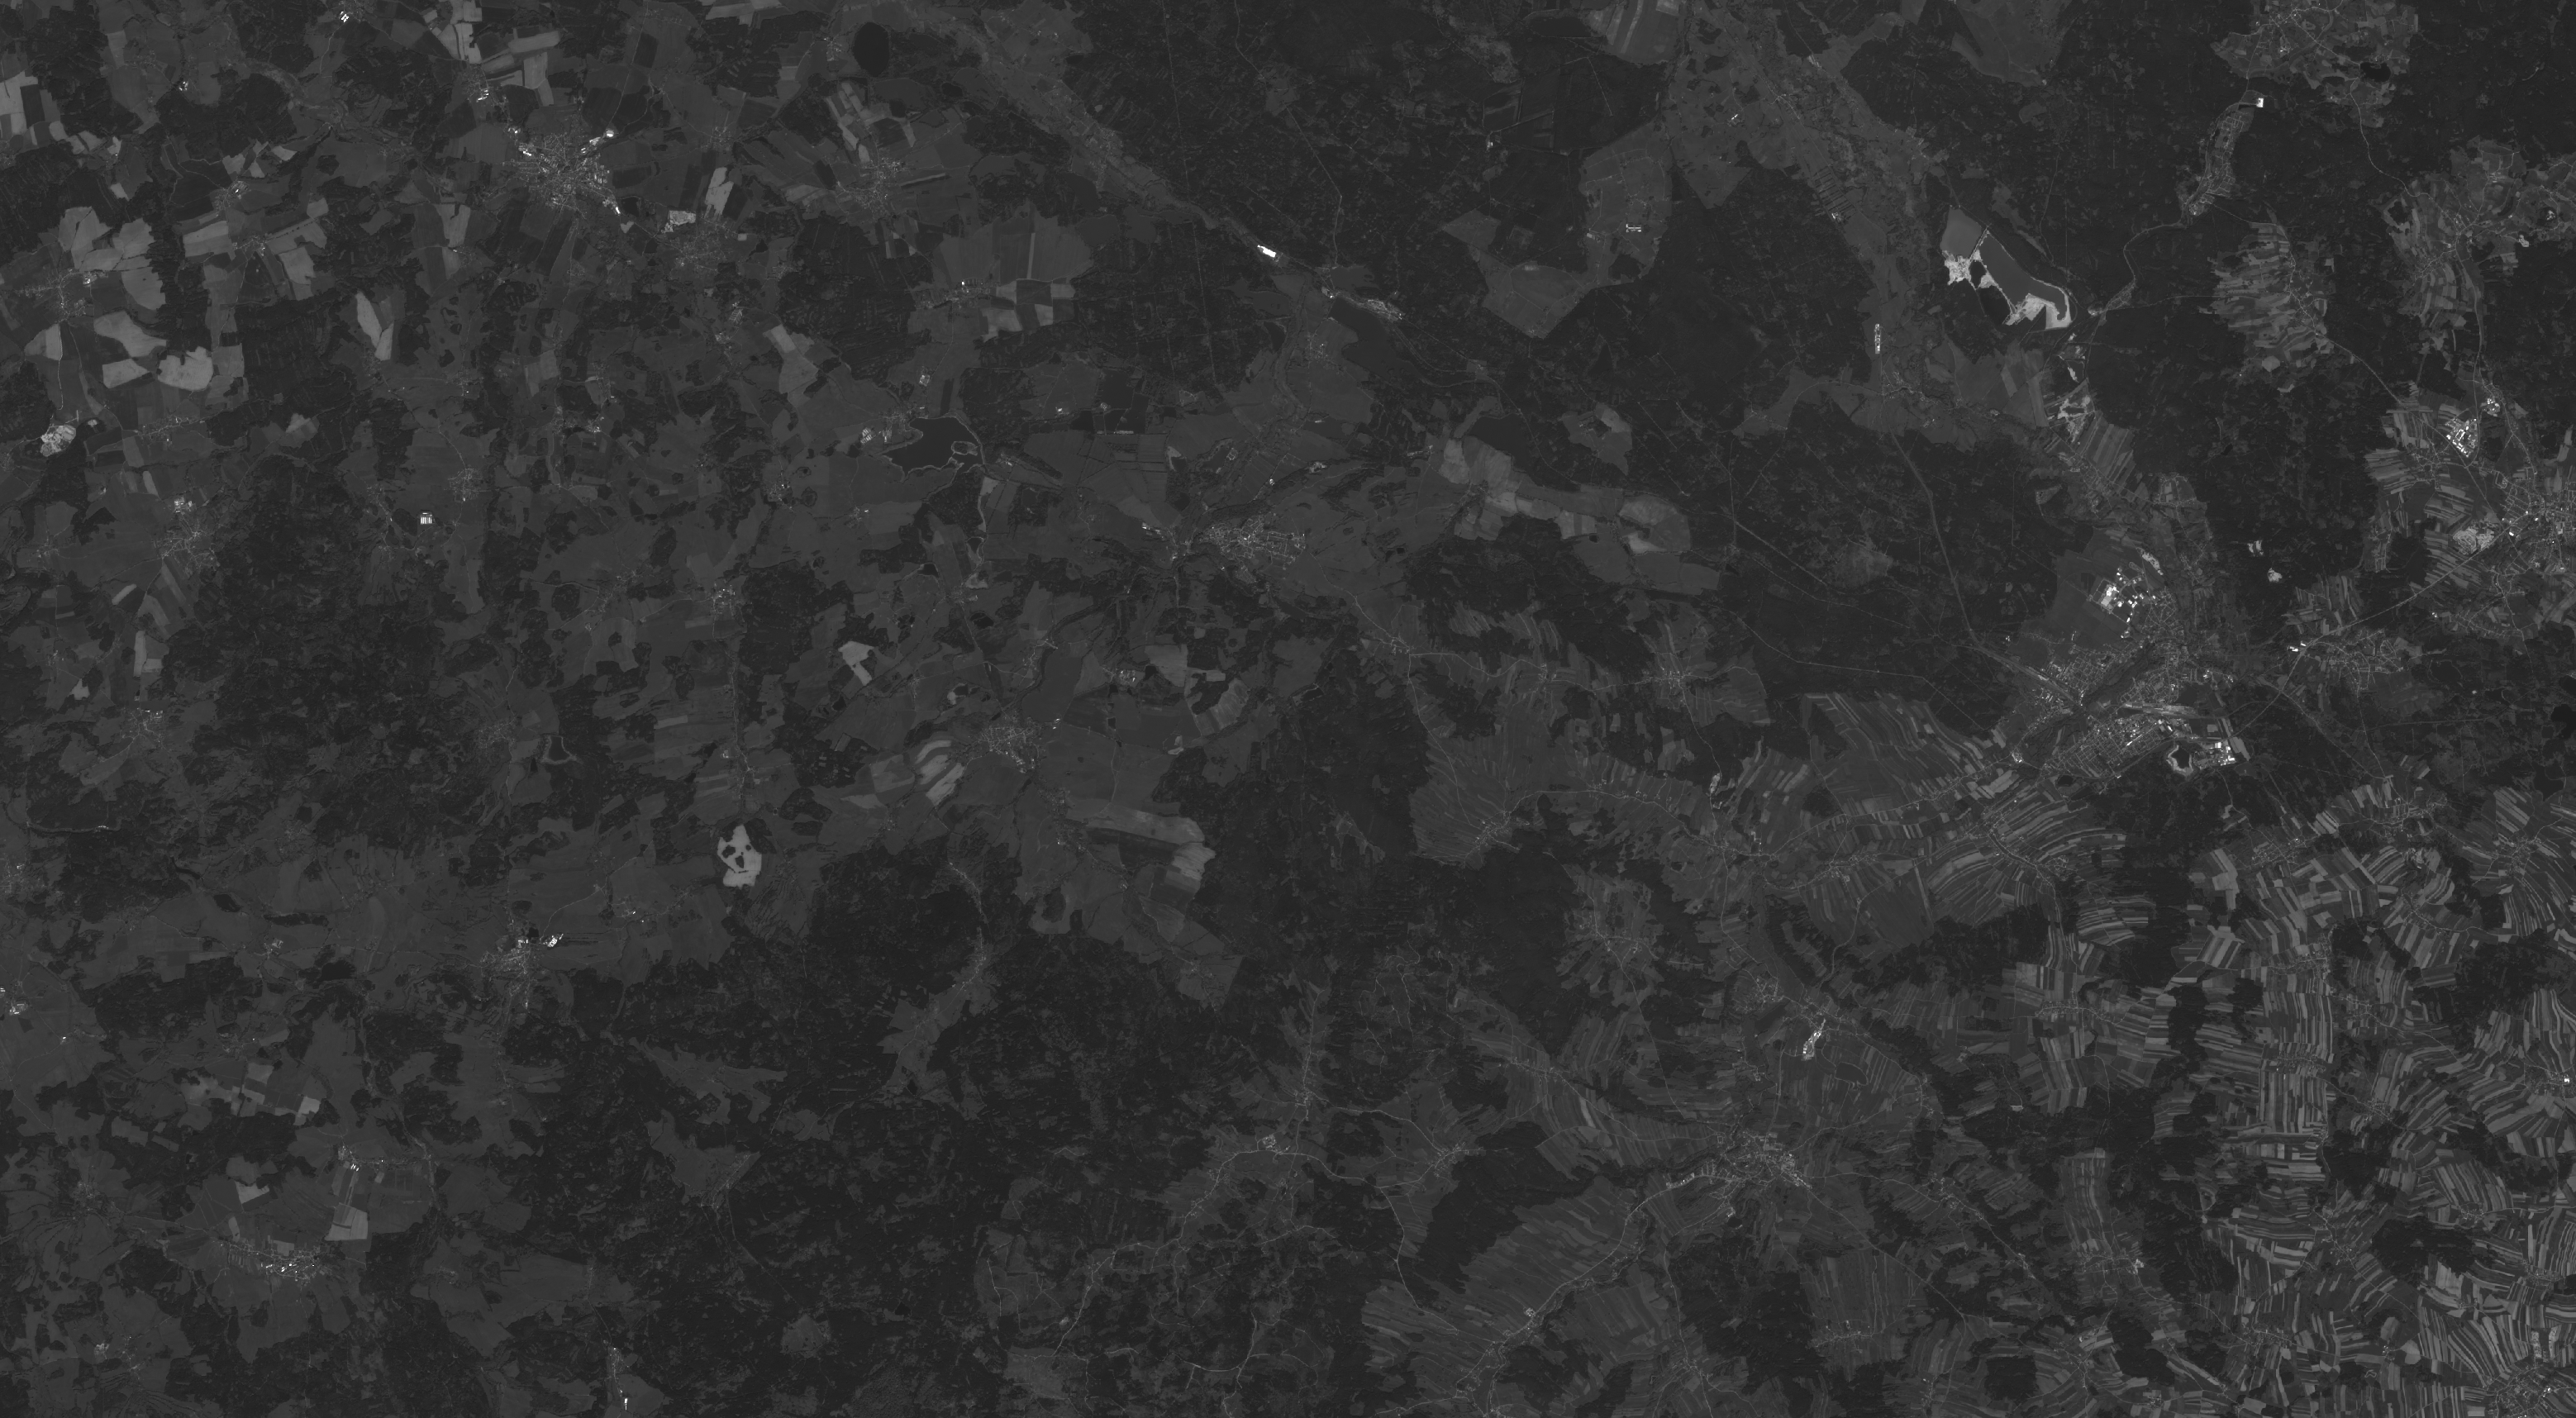

In [27]:
import PIL.Image

# we have to convert the data from 16bit to 8bit, so that PIL can work with it
bit8_green = (green.read()[0]/256).astype('uint8')
PIL.Image.fromarray(bit8_green, "L")

You can still download QGIS and display the [file](data/B03-2018-05-06.tiff) directly

![green](images/green.png)

Let's read some more raster bands

In [95]:
import numpy

red = rasterio.open('data/B04-2018-05-06.tiff')
blue = rasterio.open('data/B02-2018-05-06.tiff')

#image_data = numpy.array([
#    (red.read()[0]/256).astype('uint8'),
#    (green.read()[0]/256).astype('uint8'),
#    (blue.read()[0]/256).astype('uint8')
#])
#PIL.Image.fromarray(image_data, "RGB")

Description how to convert single bands to RGB image: https://gis.stackexchange.com/questions/257836/raw-sentinel-2-jp2-to-rgb-geotiff

Can you spot difference between Czech republic and Austria?

---
[<- Introduction to rasters](00_introduction.ipynb) | [NDVI ->](02_ndvi.ipynb)